In [109]:
import random
import json
import requests
from networkx.readwrite import json_graph
import networkx as nx
from collections import Counter
import numpy as np
from networkx.algorithms import community
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 12]

In [110]:
# Vkontakte is constantly banning for requests so imitate friends graph

# users in our social network
users_max_id = 80

# every user can have only up to 20 friends
min_friends_count = 0
max_friends_count = 20

# this is our social network that consists of list of users and links between them
social_network = {
    # format {'id': int, 'name': int}
    'nodes' : [],
    # format {'source': int, 'target': int}
    'links' : [],
}

# generate user ids and names
for i in range(1, users_max_id):
    social_network['nodes'].append({'id': i, 'name': str(i)})

# foreach user generate his friends randomly
for i in range(1, users_max_id):
    friends_count = random.randint(min_friends_count, max_friends_count)
    friends_ids = random.sample(range(1, users_max_id), friends_count)

    for j in friends_ids:
        if j == i: break
        social_network['links'].append({'source': i, 'target': j})
        social_network['links'].append({'source': j, 'target': i})

# result
social_network


{'nodes': [{'id': 1, 'name': '1'},
  {'id': 2, 'name': '2'},
  {'id': 3, 'name': '3'},
  {'id': 4, 'name': '4'},
  {'id': 5, 'name': '5'},
  {'id': 6, 'name': '6'},
  {'id': 7, 'name': '7'},
  {'id': 8, 'name': '8'},
  {'id': 9, 'name': '9'},
  {'id': 10, 'name': '10'},
  {'id': 11, 'name': '11'},
  {'id': 12, 'name': '12'},
  {'id': 13, 'name': '13'},
  {'id': 14, 'name': '14'},
  {'id': 15, 'name': '15'},
  {'id': 16, 'name': '16'},
  {'id': 17, 'name': '17'},
  {'id': 18, 'name': '18'},
  {'id': 19, 'name': '19'},
  {'id': 20, 'name': '20'},
  {'id': 21, 'name': '21'},
  {'id': 22, 'name': '22'},
  {'id': 23, 'name': '23'},
  {'id': 24, 'name': '24'},
  {'id': 25, 'name': '25'},
  {'id': 26, 'name': '26'},
  {'id': 27, 'name': '27'},
  {'id': 28, 'name': '28'},
  {'id': 29, 'name': '29'},
  {'id': 30, 'name': '30'},
  {'id': 31, 'name': '31'},
  {'id': 32, 'name': '32'},
  {'id': 33, 'name': '33'},
  {'id': 34, 'name': '34'},
  {'id': 35, 'name': '35'},
  {'id': 36, 'name': '36'},
 

In [111]:
social_network['directed'] = True
social_network['multigraph'] = False
social_network['graph'] = {}

In [112]:
G = json_graph.node_link_graph(social_network)
G

In [113]:
G.number_of_nodes()

79

In [114]:
G.number_of_edges()

1172

In [115]:
G.nodes.data()

NodeDataView({1: {'name': '1'}, 2: {'name': '2'}, 3: {'name': '3'}, 4: {'name': '4'}, 5: {'name': '5'}, 6: {'name': '6'}, 7: {'name': '7'}, 8: {'name': '8'}, 9: {'name': '9'}, 10: {'name': '10'}, 11: {'name': '11'}, 12: {'name': '12'}, 13: {'name': '13'}, 14: {'name': '14'}, 15: {'name': '15'}, 16: {'name': '16'}, 17: {'name': '17'}, 18: {'name': '18'}, 19: {'name': '19'}, 20: {'name': '20'}, 21: {'name': '21'}, 22: {'name': '22'}, 23: {'name': '23'}, 24: {'name': '24'}, 25: {'name': '25'}, 26: {'name': '26'}, 27: {'name': '27'}, 28: {'name': '28'}, 29: {'name': '29'}, 30: {'name': '30'}, 31: {'name': '31'}, 32: {'name': '32'}, 33: {'name': '33'}, 34: {'name': '34'}, 35: {'name': '35'}, 36: {'name': '36'}, 37: {'name': '37'}, 38: {'name': '38'}, 39: {'name': '39'}, 40: {'name': '40'}, 41: {'name': '41'}, 42: {'name': '42'}, 43: {'name': '43'}, 44: {'name': '44'}, 45: {'name': '45'}, 46: {'name': '46'}, 47: {'name': '47'}, 48: {'name': '48'}, 49: {'name': '49'}, 50: {'name': '50'}, 51: 

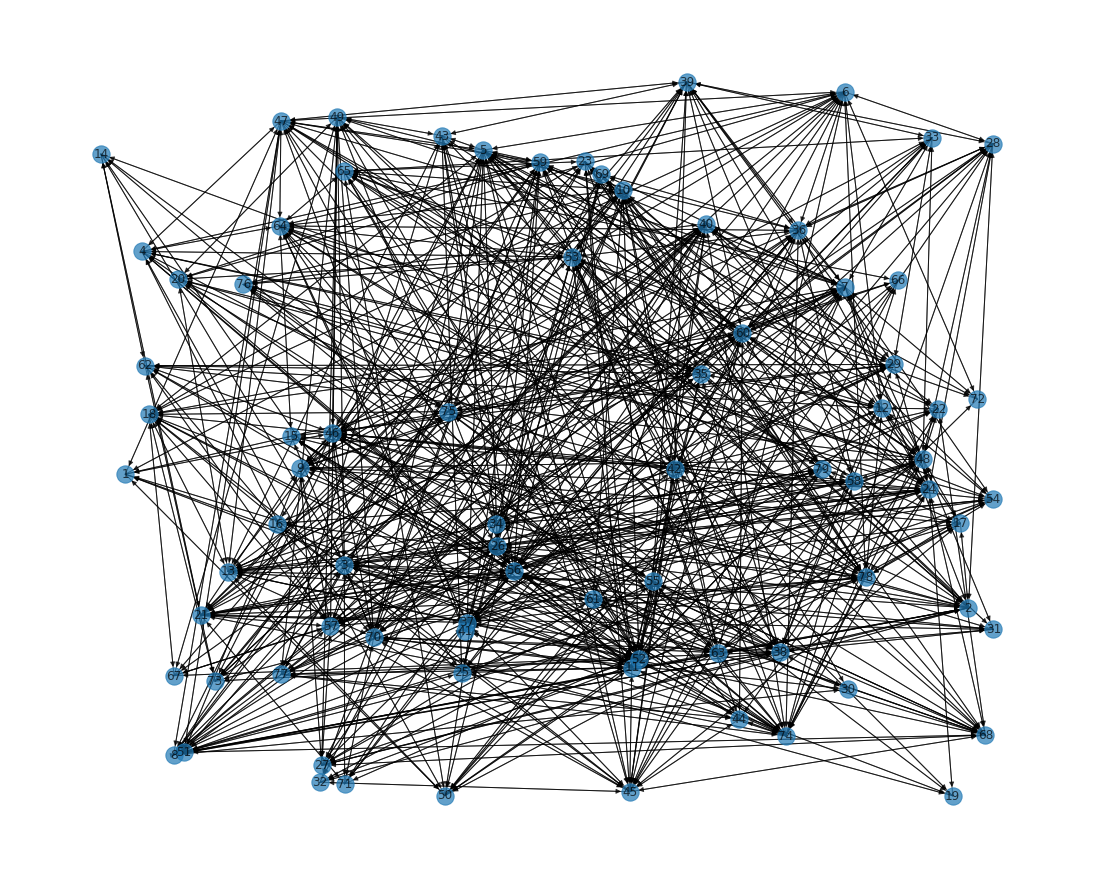

In [116]:
nx.draw_random(G, with_labels=True, alpha=0.7, labels={n[0]: n[1]['name'] for n in G.nodes.data()})

In [117]:
### Betweenness centrality

In [118]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality_counts = Counter(betweenness_centrality)
for k, v in betweenness_centrality_counts.most_common(10):
    print(G.nodes[k]['name'], v)

56 0.043033804179368154
7 0.03574291079254547
24 0.03119673969845529
48 0.03109346243997837
74 0.03011918513094178
38 0.02993182455233617
11 0.029109770246453334
2 0.026476643548036072
53 0.025997407024614047
59 0.022876990912922168


In [119]:
th = betweenness_centrality_counts.most_common(10)[-1][1]
th

0.022876990912922168

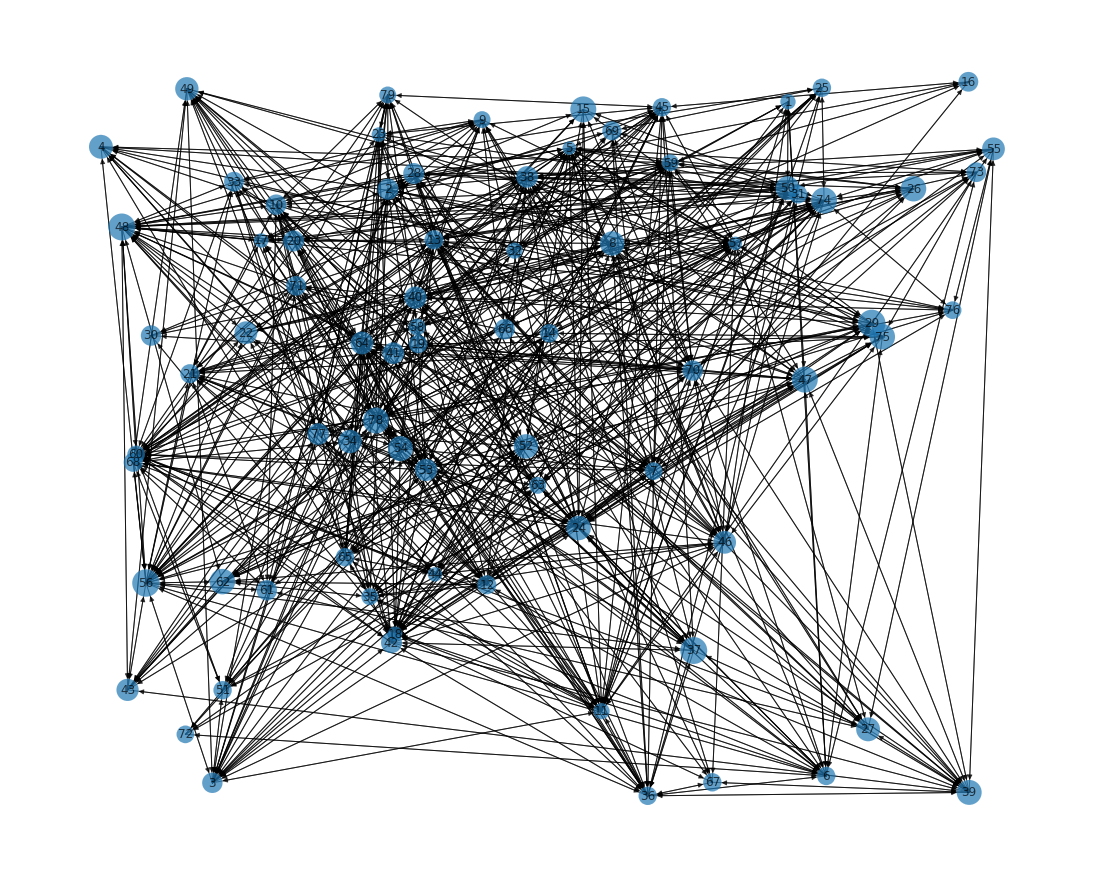

In [120]:
nx.draw_random(
    G, 
    with_labels=True, 
    alpha=0.7, 
    labels={n[0]: n[1]['name'] if degree_centrality[n[0]] > th else '' for n in G.nodes.data()}, 
    node_size=[i * 1000 for i in list(degree_centrality.values())],
    linewidths=0.1,
)

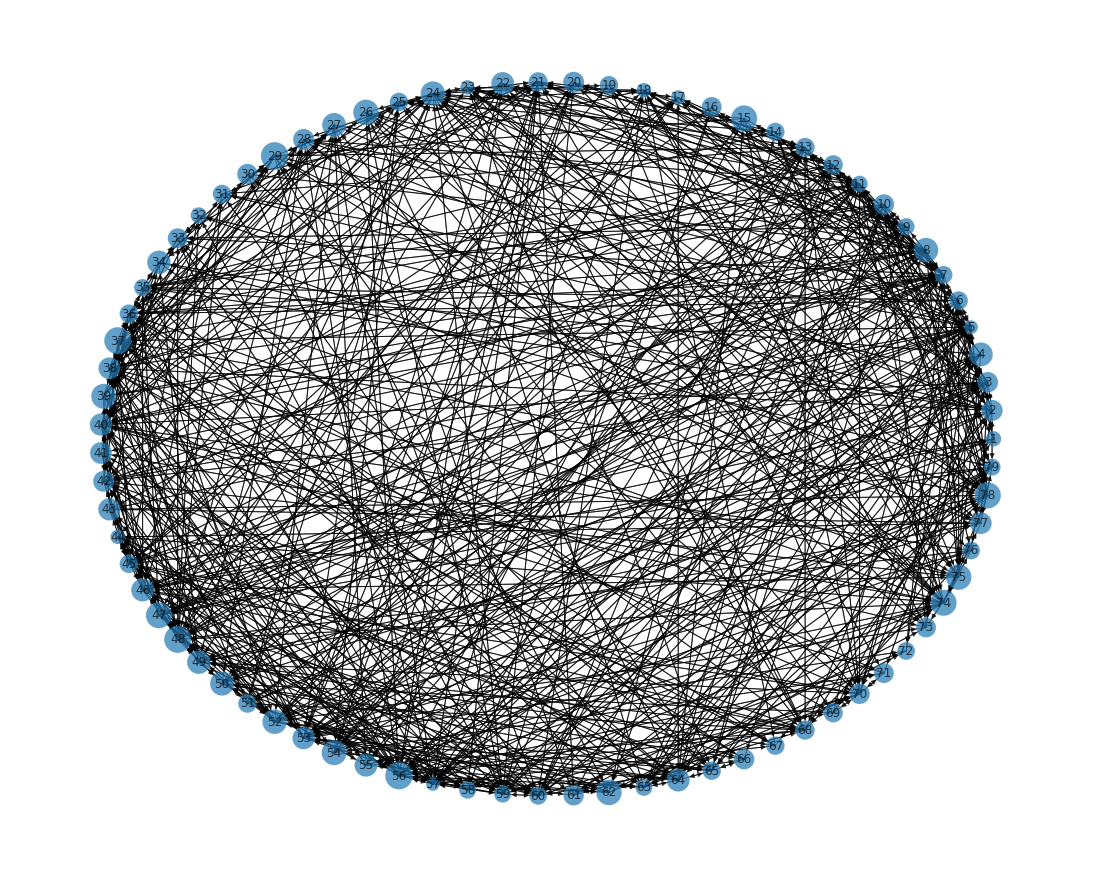

In [121]:
nx.draw_shell(
    G, 
    with_labels=True, 
    alpha=0.7, 
    labels={n[0]: n[1]['name'] if degree_centrality[n[0]] > th else '' for n in G.nodes.data()},
    node_size=[i * 1000 for i in list(degree_centrality.values())],
    linewidths=0.1,
)

In [122]:
### Degree centrality

In [123]:
degree_centrality = nx.degree_centrality(G)
degree_centrality_counts = Counter(degree_centrality)
for k, v in degree_centrality_counts.most_common(10):
    print(G.nodes[k]['name'], v)

56 0.7435897435897436
7 0.6666666666666666
5 0.641025641025641
11 0.641025641025641
24 0.641025641025641
48 0.641025641025641
53 0.6153846153846154
74 0.6153846153846154
38 0.5641025641025641
40 0.5641025641025641


In [124]:
th = degree_centrality_counts.most_common(20)[-1][1]
th

0.48717948717948717

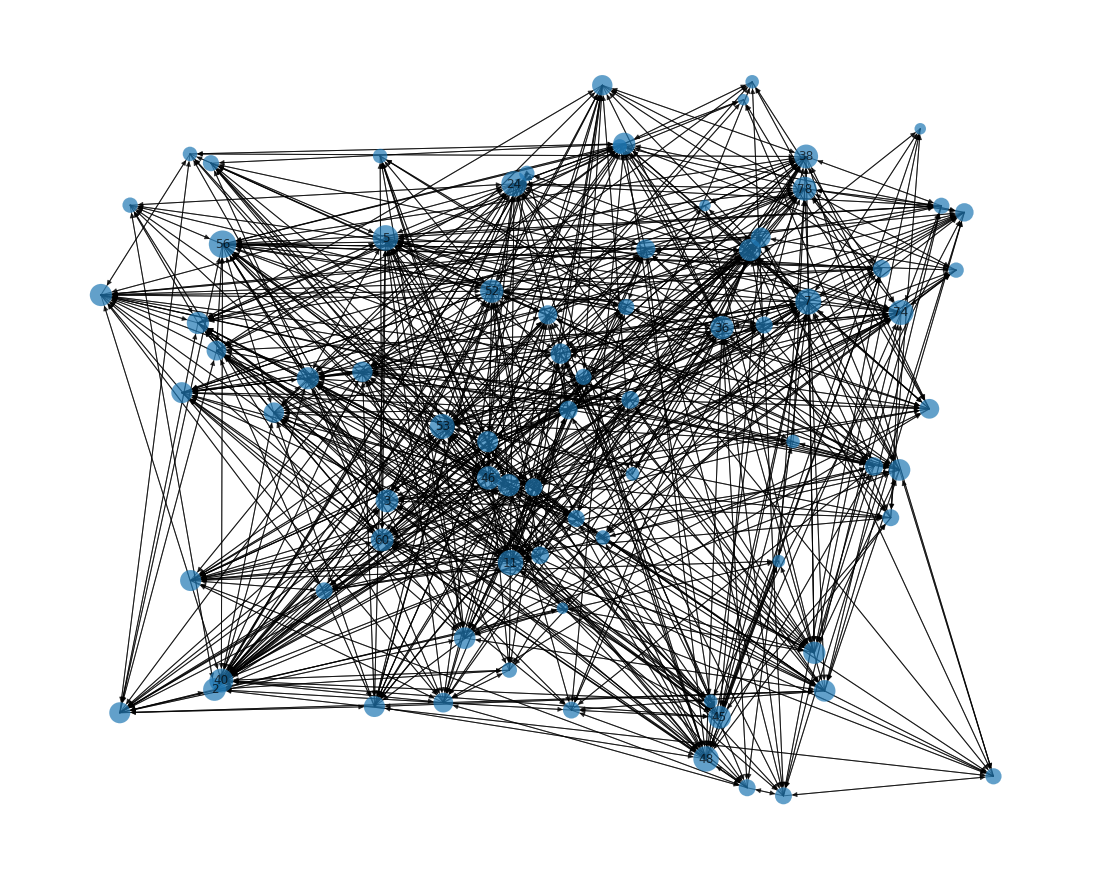

In [125]:
nx.draw_random(
    G, 
    with_labels=True, 
    alpha=0.7, 
    labels={n[0]: n[1]['name'] if degree_centrality[n[0]] > th else '' for n in G.nodes.data()}, 
    node_size=[i * 1000 for i in list(degree_centrality.values())],
    linewidths=0.1,
)

In [126]:
## Community detection

In [127]:
from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
communities = sorted(map(sorted, next_level_communities))
for c in communities:
    print('Community: ', ', '.join([G.nodes[n]['name'] for n in c]))

Community:  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79
Community:  19
Community:  72


In [128]:
# Almost every person in Community :)

In [129]:
from networkx import edge_betweenness_centrality as betweenness

def most_central_edge(G):
    centrality = betweenness(G, weight='weight')
    return max(centrality, key=centrality.get)


comp = community.girvan_newman(G, most_valuable_edge=most_central_edge)
communities = tuple(sorted(c) for c in next(comp))
for c in communities:
    print('Community: ', ', '.join([G.nodes[n]['name'] for n in c]))

Community:  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79
Community:  72


In [130]:
### CONGO

In [131]:
for c in nx.find_cliques(G.to_undirected()):
    print(c, ', '.join([G.nodes[n]['name'] for n in c]))

[1, 68, 46] 1, 68, 46
[1, 6, 47] 1, 6, 47
[1, 11, 50] 1, 11, 50
[1, 11, 60] 1, 11, 60
[1, 11, 46] 1, 11, 46
[1, 47, 52] 1, 47, 52
[1, 52, 46] 1, 52, 46
[2, 32] 2, 32
[2, 65, 35] 2, 65, 35
[2, 65, 53] 2, 65, 53
[2, 65, 79] 2, 65, 79
[2, 34, 35] 2, 34, 35
[2, 34, 79] 2, 34, 79
[2, 3, 51] 2, 3, 51
[2, 3, 46] 2, 3, 46
[2, 3, 63] 2, 3, 63
[2, 35, 46, 38] 2, 35, 46, 38
[2, 69, 7] 2, 69, 7
[2, 7, 16] 2, 7, 16
[2, 8, 17] 2, 8, 17
[2, 8, 28, 46] 2, 8, 28, 46
[2, 8, 38, 51] 2, 8, 38, 51
[2, 8, 38, 46] 2, 8, 38, 46
[2, 8, 63] 2, 8, 63
[2, 76, 53] 2, 76, 53
[2, 15] 2, 15
[2, 53, 38] 2, 53, 38
[2, 53, 63] 2, 53, 63
[2, 27, 38] 2, 27, 38
[5, 6, 70] 5, 6, 70
[5, 6, 73, 18, 75] 5, 6, 73, 18, 75
[5, 6, 78, 53] 5, 6, 78, 53
[5, 6, 47] 5, 6, 47
[5, 70, 59, 26] 5, 70, 59, 26
[5, 70, 59, 60] 5, 70, 59, 60
[5, 70, 45, 60] 5, 70, 45, 60
[5, 70, 46] 5, 70, 46
[5, 73, 24] 5, 73, 24
[5, 73, 10, 52] 5, 73, 10, 52
[5, 42, 68, 45] 5, 42, 68, 45
[5, 42, 68, 46] 5, 42, 68, 46
[5, 42, 68, 22] 5, 42, 68, 22
[5, 42, 37